## Week 5 Workshop: Regression using Non-Parametric Models

In [14]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



In [15]:
# Sample use case: Classifying Iris flower species using K Nearest Neighbors (KNN)

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target  # Labels: 0 = setosa, 1 = versicolor, 2 = virginica



In [16]:
# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing and 80% for training
# random_state=42 ensures reproducibility of the train/test split by setting a fixed seed for the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)



In [17]:
# Train the classifier
knn.fit(X_train, y_train)



KNeighborsClassifier(n_neighbors=3)

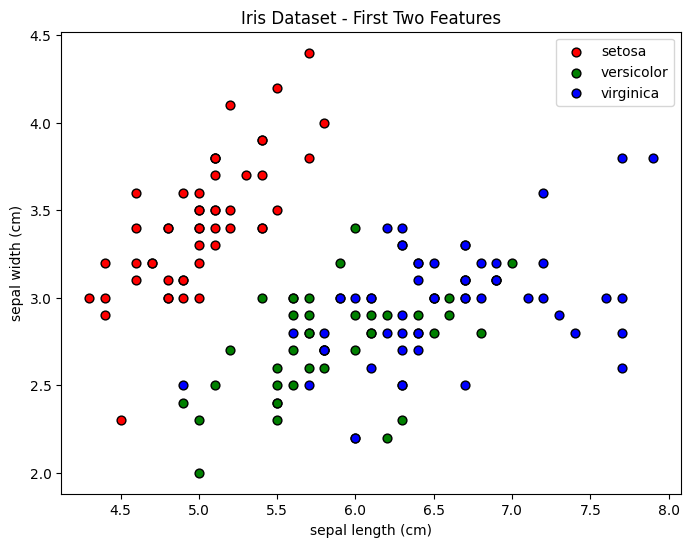

In [18]:
import matplotlib.pyplot as plt

# Use the first two features for visualization
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'green', 'blue'], iris.target_names):
    plt.scatter(X[y == target, 0], X[y == target, 1], c=color, label=label, edgecolor='k', s=40)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Iris Dataset - First Two Features")
plt.legend()
plt.show()

## Challenge: Implement a Regression based on Decision Trees

- Use the same data set (Iris)
- Choose your features (one, two, all...)
- Train, test and visualize


In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# For regression, let's predict petal length (feature index 2) using the other features
y_reg = X[:, 2]  # Petal length
X_reg = X[:, [0, 1, 3]]  # Use all features except petal length

# Split into train and test sets (reuse train_test_split if available)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_reg_train, y_reg_train)

# Predict on the test set
y_reg_pred = dt_reg.predict(X_reg_test)

# Evaluate the regression performance
mse = mean_squared_error(y_reg_test, y_reg_pred)
r2 = r2_score(y_reg_test, y_reg_pred)
mae = mean_absolute_error(y_reg_test, y_reg_pred)
rmse = np.sqrt(mse)



In [20]:

print(f"R² Score: {r2:.2f}")
print(f"Decision Tree Regression MSE (Petal Length): {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.94
Decision Tree Regression MSE (Petal Length): 0.19
Mean Absolute Error: 0.36
Root Mean Squared Error: 0.43


- The model explain the 94% of the variability of our outcome (r2)
- MAE: the model fail by 0.36 in the predictions of length
- RMSE 0.43 of 1 to 7

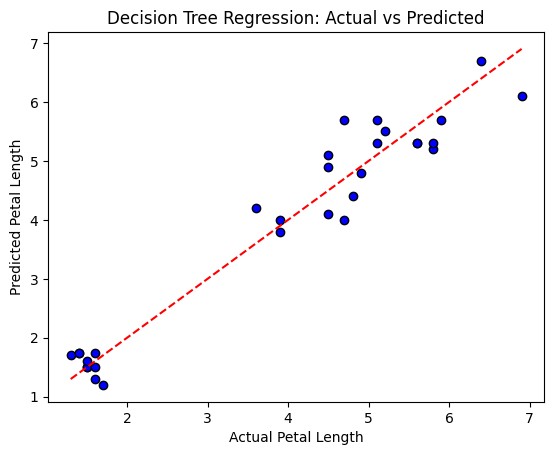

In [21]:
# Plotting 

import matplotlib.pyplot as plt
plt.scatter(y_reg_test, y_reg_pred, color='blue', edgecolor='k')
# The read line represents the ideal prediction line
plt.plot([y_reg_test.min(), y_reg_test.max()], [y_reg_test.min(), y_reg_test.max()], 'r--')
plt.xlabel('Actual Petal Length')
plt.ylabel('Predicted Petal Length')
plt.title('Decision Tree Regression: Actual vs Predicted')
plt.show()

penalizes large errors more heavily

In [22]:


# Example: Randomly generate feature values within the range of the Iris dataset
# [sepal length, sepal width, petal width]
random_sample = np.array([[10, 10, 10]])  # Replace with any values you want

# Predict petal length using the trained model
predicted_petal_length = dt_reg.predict(random_sample)
print(f"Predicted petal length: {predicted_petal_length[0]:.2f}")

Predicted petal length: 6.10
